# 2. Feature Engineering and EDA
**Andrew Dang**  

**BrainStation, Data Science**  

**Previous Notebook: 1. Data Loading, Preprocessing and Cleaning**

**Next Notebook: 3. Modeling**

In the previous notebook, we completed some initial cleaning on the dataset. 

In this notebook, we will be performing some feature engineering, and some exploratory data analysis. 

Notably, I want to explore the following questions.
1. What is the distribution of the ratings?
2. What are the summary statistics of our features in the dataset?
3. Is there any correlation between our continuous input variables and the target variable?
4. What are the most common words used across all the reviews in the dataset?

First, lets import our packages and read in the cleaned data. 

In [1]:
# Import standard data science packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats

# Utility packages
from wordcloud import WordCloud
import joblib

In [2]:
# Read in preprocessed and cleaned data
data = joblib.load('data/cleaned_data.pkl')

# Inspect the data
data.head()

,name,review.point,Blended Malt Scotch Whisky,Blended Scotch Whisky,Grain Scotch Whisky,Single Grain Whisky,Single Malt Scotch,price_string,cleaned_reviews
0,"Johnnie Walker Blue Label, 40%",97,0.0,1.0,0.0,0.0,0.0,225.0,magnificently powerful and intense caramels dr...
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",97,0.0,0.0,0.0,0.0,1.0,4500.0,what impresses me most is how this whisky evol...
2,"Bowmore 46 year old (distilled 1964), 42.9%",97,0.0,0.0,0.0,0.0,1.0,13500.0,there have been some legendary bowmores from t...
3,"Compass Box The General, 53.4%",96,1.0,0.0,0.0,0.0,0.0,325.0,with a name inspired by a 1926 buster keaton m...
4,"Chivas Regal Ultis, 40%",96,1.0,0.0,0.0,0.0,0.0,160.0,captivating enticing and wonderfully charming ...


***

## Count the number of words in each review
I suspect that reviewers will write more and rave on about highly rated whiskys. We will define a function that counts the number of words in each review and add that to our dataset.  

In [3]:
# Define function and lambda function to count the number of words in each review
def review_length(text):
    '''
    Takes in a string and counts the number of words in the string
    '''
    num_words = len(text.split(' '))
    return num_words

length_of_review = lambda x: review_length(x)

data['review_length'] = data['cleaned_reviews'].apply(length_of_review)

data.head()

,name,review.point,Blended Malt Scotch Whisky,Blended Scotch Whisky,Grain Scotch Whisky,Single Grain Whisky,Single Malt Scotch,price_string,cleaned_reviews,review_length
0,"Johnnie Walker Blue Label, 40%",97,0.0,1.0,0.0,0.0,0.0,225.0,magnificently powerful and intense caramels dr...,66
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",97,0.0,0.0,0.0,0.0,1.0,4500.0,what impresses me most is how this whisky evol...,82
2,"Bowmore 46 year old (distilled 1964), 42.9%",97,0.0,0.0,0.0,0.0,1.0,13500.0,there have been some legendary bowmores from t...,84
3,"Compass Box The General, 53.4%",96,1.0,0.0,0.0,0.0,0.0,325.0,with a name inspired by a 1926 buster keaton m...,77
4,"Chivas Regal Ultis, 40%",96,1.0,0.0,0.0,0.0,0.0,160.0,captivating enticing and wonderfully charming ...,71


In [4]:
# Save data with engineered feature to disk
joblib.dump(data, 'data/data_with_engineered_feature.pkl')

['data/data_with_engineered_feature.pkl']

***

## Distribution of the ratings

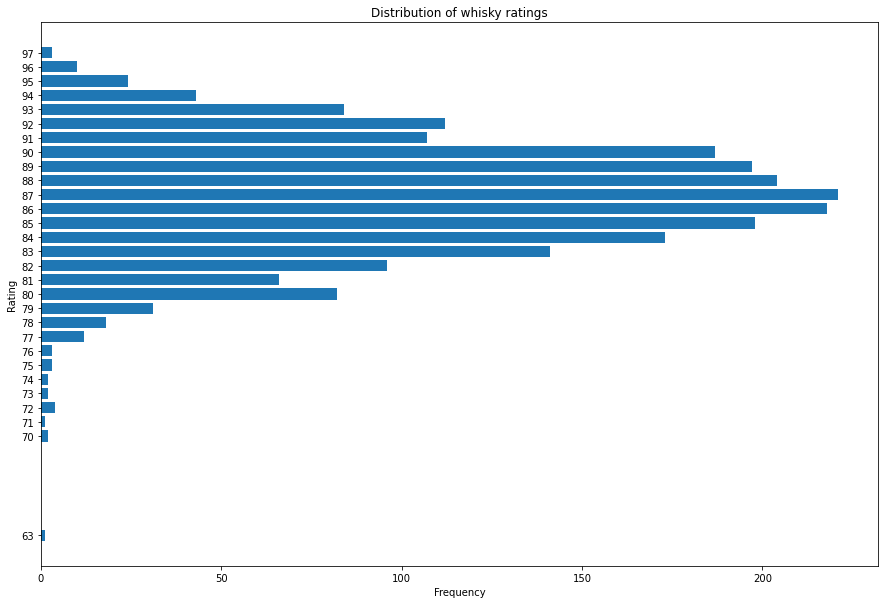

In [5]:
# Plot the distribution of the scores
ratings = data['review.point'].value_counts().sort_index()

# plot rating vs frequency
plt.figure(figsize=(15,10))
plt.barh(ratings.index, ratings)
plt.title('Distribution of whisky ratings')
plt.xlabel('Frequency')
plt.ylabel('Rating')
plt.yticks(ratings.index)
plt.show()

The distribution is farily normal, but it appears left-skewed (long-tail towards low scoring whiskys). 

***

## Summary statistics

In [6]:
# Describe the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
review.point,2245.0,86.701559,4.052796,63.0,84.0,87.0,90.0,97.0
Blended Malt Scotch Whisky,2245.0,0.058797,0.235297,0.0,0.0,0.0,0.0,1.0
Blended Scotch Whisky,2245.0,0.093987,0.291875,0.0,0.0,0.0,0.0,1.0
Grain Scotch Whisky,2245.0,0.012472,0.111005,0.0,0.0,0.0,0.0,1.0
Single Grain Whisky,2245.0,0.025390,0.157341,0.0,0.0,0.0,0.0,1.0
Single Malt Scotch,2245.0,0.809354,0.392898,0.0,1.0,1.0,1.0,1.0
price_string,2245.0,563.410706,4026.782715,12.0,70.0,110.0,200.0,157000.0
review_length,2245.0,72.054788,21.420003,3.0,62.0,72.0,79.0,225.0


- The average rating for the whiskys in the dataset is 86.7. The range of ratings is between 63 and 97. 
- There is a large variance in the price of whiskys
- The average review is only 72 words in length

***

## Checking for correlations

In [7]:
# Check the correlation coefficient and p-value between each continuous variable and the target variable
for feature in ['price_string', 'review_length']:
    r = stats.pearsonr(data['review.point'], data[feature])[0]
    p = stats.pearsonr(data['review.point'], data[feature])[1]
    print(f"Feature: {feature} ... r={r} ... p={p}")

# Extract continuous variables from the dataset
cont_var = data[['review.point', 'price_string', 'review_length']]

# Correlation matrix 
cont_var.corr().style.background_gradient('coolwarm')

Feature: price_string ... r=0.12808032456684176 ... p=1.1266543441467823e-09
Feature: review_length ... r=0.12732671116219402 ... p=1.4110170846947998e-09


,review.point,price_string,review_length
review.point,1.000000,0.128080,0.127327
price_string,0.128080,1.000000,0.033093
review_length,0.127327,0.033093,1.000000


There appears to be a significant weak positive correlation between both the length of the review, and the price of the whisky with the rating of the whisky. 

***

## What are the most common words used in reviews?
One way to visualize the most commonly used words in the corpus is to use a word cloud. The bigger the word appears in the word cloud, the more often the word is used across all reviews in the dataset. 

There are 948503 words in the combination of all reviews


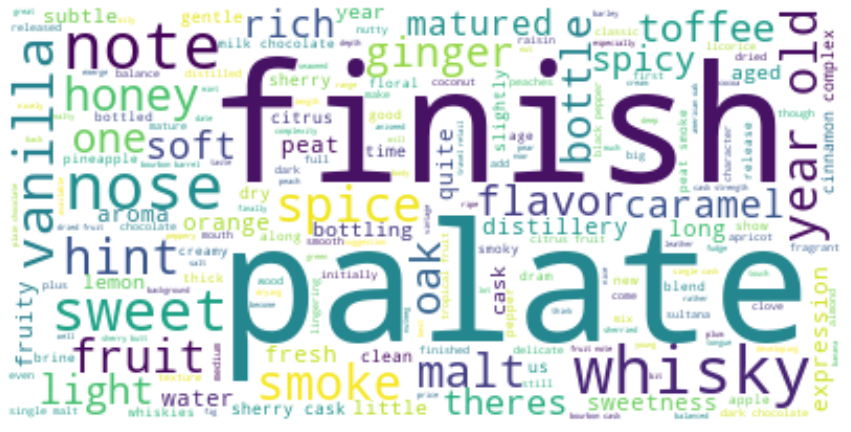

In [8]:
# combine all reviews into a text to create wordcloud
text = " ".join(review for review in data['cleaned_reviews'])
print(f'There are {len(text)} words in the combination of all reviews')

# create the wordcloud
plt.figure(figsize=(15,10))
wordcloud = WordCloud(background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

It seems the most commonly used words to describe whisky include palate, finish, whisky, sweet, nose, note, vanilla, and spice.
Most of these words are general terms to describe how a whisky tastes, with some specific flavours included. This is not surprising as you would expect whisky reviews to spend lots of time talking about the favours of a whisky. Once we model our data, it will be interesting to see which of these flavours positively and negatively affect the rating. As most of our whiskys in the dataset are relatively high scoring, I suspect that the flavours we see in the word cloud positively affect the rating. 
***

## Conclusion 
In this notebook, we checked the distribution of whisky ratings, inspected the summary statistics of our features, looked at the correlation coefficients, and also looked for the most common words used in our dataset. On top of this, we also engineered one feature, the length of the review defined as the number of words in each review. 

We saved the dataset with our engineered feature added to it. 

In the next notebook, **3. Modeling**, we will try to find the best model for our problem, as well as the best numerical representation for our text data. 